<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_09_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1241.83860323] [3192.69585141]
[39.01714496] -709.0186449535477
0.939846333997604
0.8247503123313558
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25 

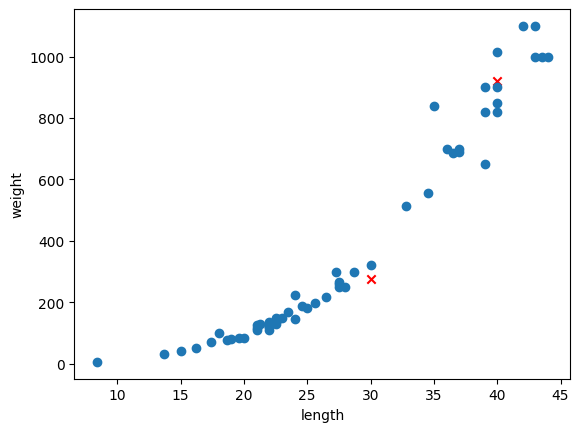

In [ ]:
#이웃하는 녀석들의 평균을 구한다 = 정규분포

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #선형회귀를 하기 위한 2줄
lr = LinearRegression()
import matplotlib.pyplot as plt


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1) #가로로 있던 데이터가 세로로 세워짐 42행 1열로 만들어라 라는 뜻이기 때문
test_input = test_input.reshape(-1,1)
# knr.fit(train_input, train_target) #최근접 이웃 훈련
lr.fit(train_input, train_target)

print(lr.predict([[50]]), lr.predict([[100]]))
print(lr.coef_, lr.intercept_)

print(lr.score(train_input, train_target)) #훈련정확도
print(lr.score(test_input, test_target)) #테스트 정확도

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_input)
print(train_poly)
print(test_poly)

lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

#계수 확인
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) #훈련정확도
print(lr.score(test_poly, test_target)) #테스트 정확도

# print(knr.predict([[30]]), knr.predict([[40]]), knr.predict([[50]]), knr.predict([[60]]), knr.predict([[100]]))

#여기서부터는 산점도를 찍는 과정
plt.scatter([30], [275], marker='x', c='red')
plt.scatter([40], [921], marker='x', c='red')

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# knr.score(test_input, test_target)
# knr.score(train_input, train_target)

# print(knr.score(test_input, test_target)) #테스트
# print(knr.score(train_input, train_target)) #훈련
#train은 훈련한 건데 96%가 나오고 테스느는 99%가 나왔다?
#k-최근접 분류는 거의 다 맞아!
#회귀는 평균을 가깝게 맞히는 거지 정확하게 계산하지 못한다 그래서 score를 구하는 방법이 조금 다르다!
#결정계수로 구하는데 결정계수=1 : 완벽 / 결정계수=0 : 예측하지 못함
#과대, 과소적합 중요하다고 언급!!

# print(train_input) #여기까지 했을 때의 데이터는
# print(test_input)
# plt.scatter(perch_length, perch_weight)
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

가중치과 y값이 선형이다 그래서 선형회귀라고 합니다
가중치와 y값의 관계 = 선형
왜 직선이 아닌데 선형이지?라고 물음을 가진다면 가중치와 y값의 관계를 생각해볼 것

<10/2>

하이퍼파라미터 3.3.1 굉장히 중요한 얘기 중이라고 언급하고 계심

하이퍼파라미터를 입력해야 함
제일 좋은 정확도에 k를 찍는다

훈련_poly를 만들엇다
학습을 시키면 어.. 50과 50**2 하면 아깐 1000얼마였는데 1024인가? 넘게 나옴

시험 문제에는 다중회귀 출제 ㄴㄴ

